## Malware Classification on Behavioral Data Challenge 5 

### Read the input data files.

In [1]:
import numpy as np
import os
XTrain = np.loadtxt('training_data.csv', skiprows=1, usecols=(0,1), delimiter=',', dtype='str')
print XTrain[0]
# XTest = np.loadtxt('test_data_public_new.csv', skiprows=1, usecols=(1,), delimiter=',',dtype='str')
# print XTest[0]
YTrain = XTrain[:,-1]
XTrain = XTrain[:,0]
print XTrain.shape
YTrain = YTrain.astype(np.int)
# YTrain = YTrain.reshape(-1,1)
print type(YTrain[0]),YTrain[0],YTrain.shape
# print XTest.shape

['0' '10']
(2042,)
<type 'numpy.int64'> 10 (2042,)


In [2]:
print XTrain, YTrain

['0' '1' '2' ..., '2039' '2040' '2041'] [10 10 10 ..., 10  5 10]


In [3]:
def readInputFile(inputFile):
    with open(inputFile,'r') as f:
        fileContent = f.readlines()
        f = [i.strip('\n') for i in fileContent]
        return ' '.join(f)

In [4]:
def readFolder(folder, fileNames):
    path = folder
    folderContents = []
    for f in fileNames:
        folderContents.append(readInputFile(os.path.join(folder, f+'.txt')))
    return folderContents

In [5]:
trainSamples = readFolder(os.getcwd()+os.sep+'train', XTrain)
print len(trainSamples), trainSamples[:2]
XTest = [str(i) for i in range(706)]
testSamples = readFolder(os.getcwd()+os.sep+'test', XTest)
print len(testSamples), testSamples[:2]

2042 ['FlsAlloc FlsFree FlsGetValue FlsSetValue InitializeCriticalSectionEx CreateSemaphoreExW SetThreadStackGuarantee CreateThreadpoolTimer SetThreadpoolTimer WaitForThreadpoolTimerCallbacks CloseThreadpoolTimer CreateThreadpoolWait SetThreadpoolWait CloseThreadpoolWait FlushProcessWriteBuffers FreeLibraryWhenCallbackReturns GetCurrentProcessorNumber GetLogicalProcessorInformation CreateSymbolicLinkW SetDefaultDllDirectories EnumSystemLocalesEx CompareStringEx GetDateFormatEx GetLocaleInfoEx GetTimeFormatEx GetUserDefaultLocaleName IsValidLocaleName LCMapStringEx GetCurrentPackageId GetUserNameExA SHGetFolderPathA GetDiskFreeSpaceExA WSALookupServiceBeginW WSALookupServiceEnd WSALookupServiceNextW WSANSPIoctl getaddrinfo freeaddrinfo getnameinfo RasDialW RasHangUpW RasEnumEntriesW RasGetEntryDialParamsW RasSetEntryDialParamsW RasEditPhonebookEntryW RasCreatePhonebookEntryW RasGetErrorStringW RasGetConnectStatusW RasEnumConnectionsW RasGetEntryPropertiesW RasGetCredentialsW RasSetCrede

In [6]:
# for item in trainFolder:
count = 0
indices = []
for i in xrange(len(trainSamples)):
    if trainSamples[i]=='':
        indices.append(i)
        
print len(indices)

257


In [7]:
for i in indices:
    print i,YTrain[i]

5 10
7 10
25 10
31 10
37 10
42 10
45 10
48 10
64 10
97 10
101 10
103 10
114 10
115 10
116 10
143 10
149 10
153 10
169 10
170 5
201 10
210 10
217 10
223 10
227 10
232 10
236 10
255 10
264 2
277 10
278 10
280 10
307 10
308 10
317 10
333 10
336 10
340 10
341 10
347 10
367 10
383 10
384 10
387 10
388 10
389 10
405 10
424 10
437 10
449 10
450 10
453 10
456 10
464 10
479 3
505 10
511 10
514 10
534 10
535 10
541 10
553 10
562 10
565 10
566 10
573 10
596 10
601 10
623 10
628 10
629 10
634 10
654 10
658 3
663 10
666 10
669 10
670 10
678 10
698 10
708 10
715 10
736 10
740 10
777 10
782 10
793 2
804 10
809 10
835 10
846 10
849 10
860 10
877 10
878 10
888 10
898 10
899 5
908 10
914 10
927 10
933 10
936 2
937 10
957 10
959 10
961 10
963 10
967 10
993 10
997 10
1008 10
1021 10
1026 10
1027 10
1029 10
1034 10
1037 10
1058 10
1060 10
1070 5
1072 10
1075 7
1077 4
1084 10
1086 10
1088 10
1092 10
1094 10
1100 10
1101 10
1104 10
1105 10
1128 10
1129 3
1157 9
1158 10
1173 10
1179 10
1182 10
1185 10
1213 10

### Check Missing Test Cases from Challenge 3

In [8]:
predictionsC3 = os.getcwd()+os.sep+'C3_Predictions.csv'
trainC3 = os.getcwd()+os.sep+'training_data_C3.csv'
testC3 = os.getcwd()+os.sep+'test_data_public_C3.csv'
missingTest = os.getcwd()+os.sep+'test_data_missing_cuckoo.txt'
XTestMissing = np.loadtxt(missingTest, usecols=(0,1), delimiter=',', dtype='str')
XTrainC3 = np.loadtxt(trainC3, skiprows=1, usecols=(0,1,2), delimiter=',', dtype='str')
XTestC3 = np.loadtxt(testC3, skiprows=1, usecols=(0,1), delimiter=',', dtype='str')
PredictionsC3 = np.loadtxt(predictionsC3, skiprows=1, usecols=(0,1), delimiter=',', dtype='str')
print XTestMissing
print XTestC3[0], XTrainC3[0], PredictionsC3[0]

[['69' '94af7ecc940f3f2e0bec2e1e920193a9']
 ['364' 'e29f3b970b8487e06dd321c48f015493']
 ['661' '4f449201ecb529ff71a321d6d41d626e']
 ['33' '0231aebb8155fd069d17eab6a679cc1e']
 ['104' '8184fedd04e1b3642a77ac96298877c9']
 ['508' '3cdd0fb587ca6c28c891ff4c75cfe06c']
 ['521' '016b512e068383a7800166ce945bfb4e']
 ['179' 'b531346046175207d3b6f326b672d3f8']
 ['518' '8ada2473ff702a617facc11d6b1ee8ff']
 ['413' 'e15d7135b0ee671539d100600905bea6']
 ['398' 'f2a28a9059a7e9884c5f6c46ae5a98f4']
 ['396' '031b79d4410b3a924803fc46e06bd945']
 ['279' 'a1aba44b004024083d592e4310469fb1']
 ['76' '294725ae35ecfb4f5e0d29239213c2c7']
 ['130' '4fded173211150d51dd97a36ec9797c9']
 ['452' 'c95ce84ed7dbf6bf3d68b2669d10d2a2']
 ['298' 'f25de5a9c41c04e8a29b9c6617e628b0']
 ['606' '00a5b00e9702871aced2b91134c298a1']
 ['445' '0494d448cc476652b08879486bff7634']
 ['107' 'd7980d1fb080e8831301fb303a2bc5a6']
 ['29' 'c67562a02c791c793df0bccf7ffaaf98']
 ['489' '06258bf3b56c9c46c6b38c64820a11dc']
 ['316' '637d40585d5225df5b47465c13f

In [9]:
missingPredictionsFromC3 = {}
for test in XTestMissing:
#     print test, test[1], test[1] in XTrainC3[:,1], test[1] in XTestC3[:,1]
    if test[1] in XTrainC3[:,1]:
        for c3train in XTrainC3:
            if c3train[1] == test[1]:
                print c3train, test[1]
                missingPredictionsFromC3[test[1]] = c3train[2]
    elif test[1] in XTestC3[:,1]:
        for c3test in XTestC3:
            if c3test[1] == test[1]:
#                 print c3test, test[1], PredictionsC3[int(c3test[0])][-1]
                missingPredictionsFromC3[test[1]] = (int(test[0]),int(PredictionsC3[int(c3test[0])][-1]))
    else:
#         print test[1]
        missingPredictionsFromC3[test[1]] = (int(test[0]),-1)
print missingPredictionsFromC3

{'0146dc784d2b5f2b819e82468f9e388a': (531, -1), 'd7980d1fb080e8831301fb303a2bc5a6': (107, -1), '00a5b00e9702871aced2b91134c298a1': (606, 10), '031b79d4410b3a924803fc46e06bd945': (396, 2), '0494d448cc476652b08879486bff7634': (445, 3), 'b531346046175207d3b6f326b672d3f8': (179, 10), '4fded173211150d51dd97a36ec9797c9': (130, 10), '0614f6a2c6853e2c06da01a213ed8458': (126, 10), '4f449201ecb529ff71a321d6d41d626e': (661, 5), 'a1aba44b004024083d592e4310469fb1': (279, 10), '372f1c5c378cc2b6a45ec16af441c570': (109, 10), '8ada2473ff702a617facc11d6b1ee8ff': (518, -1), 'e15d7135b0ee671539d100600905bea6': (413, 10), 'e29f3b970b8487e06dd321c48f015493': (364, 1), 'c95ce84ed7dbf6bf3d68b2669d10d2a2': (452, 4), '294725ae35ecfb4f5e0d29239213c2c7': (76, 10), '0015d7459d4965b83826808d0a47d1ab': (244, 5), '08754896596057aa06ccd4eb4b393ce1': (46, 7), 'f2a28a9059a7e9884c5f6c46ae5a98f4': (398, 10), 'f25de5a9c41c04e8a29b9c6617e628b0': (298, 10), '6bdfd87e94df7763f26bcce3485fd702': (280, 10), 'c67562a02c791c793df0

In [10]:
# import pyvw
# def cleanVWMessages(XMessages, YTrain, train=False):
#     cleanVW = []
#     Y = 0
#     for i in xrange(len(XMessages)):
#         if train:
#             Y = int(YTrain[i])
#         else:
#             Y = -1
#         if XMessages[i]:
#             cleanVW.append((Y,' | '.join(c for c in XMessages[i] if c not in ':|\n\t\r')))
#             #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + ''.join(c for c in trainSubjects[i] if c not in ':|\n\t\r') +'\r')
#         else:
#             cleanVW.append((Y,' '))
#             #f.write(str(Y) + ':' + '|' + str(i+1)+' subject:' + '' +'\r')
#     # f.close()
#     print len(cleanVW)
#     return cleanVW
# #     print trainVW[0]

In [11]:
# print trainFolder[:2]
# trainClean = cleanVWMessages(trainFolder, YTrain, train=True)
# print trainClean[0:2]
# print testFolder[:2]
# testClean = cleanVWMessages(testFolder, YTrain, train=False)
# print testClean[0:2]

In [12]:
# def classifyVW(XTrain, XTest, YTrain, YTest, XTestSubs, XTestEmailBody, XTestSender, XTestDate, params, ruled):
#     parameters = params['parameters']
#     vw = pyvw.vw(parameters)
#     for train in XTrain:
#         ex = vw.example(str(train[0]) + " | " + train[1])
#         ex.learn()
#     YPred = []
#     for test in XTest:
#         ex1 = vw.example(" | " + test[1])
#         ex1.learn() 
#     #     print ex1.get_updated_prediction(),ex1.get_simplelabel_prediction() #<-- the same for every prediction?
#         if ex1.get_simplelabel_prediction() > 0:
#             YPred.append(1)
#         else:
#             YPred.append(0)
#     if ruled:
#         rules = params['rules']

#         for r in rules:
#             if r==1:
#                 YPred = ApplyStaticRule1(XTestSubs, YPred)
#             elif r==2:
#                 YPred = ApplyStaticRule2(XTestEmailBody, YPred)
#             elif r==3:
#                 YPred = ApplyStaticRule3(XTestDate, YPred)
#             elif r==4:
#                 YPred = ApplyStaticRule4(XTestSender, YPred)
#             elif r==5:
#                 YPred = ApplyStaticRule5(XTestEmailBody, YPred)

# #     return YPred
#     YPred = np.array(YPred)
#     YTest = np.array(YTest)
#     diff = YPred - YTest
#     score = diff[diff == 0].size
#     return (100.0 * score)/(YPred.size)


In [13]:
# parameters = ''
# vw = pyvw.vw(parameters)
# for train in trainClean:
#     ex = vw.example(str(train[0]) + " | " + train[1])
#     ex.learn()
# YPred = []
# for test in testClean:
#     ex1 = vw.example(" | " + test[1])
#     ex1.learn() 
# #     print ex1.get_updated_prediction(),ex1.get_simplelabel_prediction() #<-- the same for every prediction?
#     if ex1.get_simplelabel_prediction() >= 10:
#         YPred.append(10)
#     elif ex1.get_simplelabel_prediction() >= 9:
#         YPred.append(9)
#     elif ex1.get_simplelabel_prediction() >= 8:
#         YPred.append(8)
#     elif ex1.get_simplelabel_prediction() >= 7:
#         YPred.append(7)
#     elif ex1.get_simplelabel_prediction() >= 6:
#         YPred.append(6)
#     elif ex1.get_simplelabel_prediction() >= 5:
#         YPred.append(5)
#     elif ex1.get_simplelabel_prediction() >= 4:
#         YPred.append(4)
#     elif ex1.get_simplelabel_prediction() >= 3:
#         YPred.append(3)
#     elif ex1.get_simplelabel_prediction() >= 2:
#         YPred.append(2)
#     elif ex1.get_simplelabel_prediction() >= 1:
#         YPred.append(1)
#     elif ex1.get_simplelabel_prediction() >= 0:
#         YPred.append(0)

# writePrdictedLabelFile(YPred)
        
# #     else:
# #         YPred.append(0)

# #     return YPred
# # YPred = np.array(YPred)
# # YTest = np.array(YTest)
# # diff = YPred - YTest
# # score = diff[diff == 0].size
# # return (100.0 * score)/(YPred.size)


### Bag of Words

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# print vectorizer
# CountVectorizer(analyzer__min_n=1)
XTr = vectorizer.fit_transform(trainSamples)
# corpus = [
#     'This is the first document.',
#     'This is the second second document.',
#     'And the third one.',
#     'Is this the first document?',
# ]
# X = vectorizer.fit_transform(corpus)
# print X
print len(vectorizer.get_feature_names())
trainBagVector = XTr.toarray()
print trainBagVector.shape
XTe = vectorizer.transform(testSamples)
testBagVector = XTe.toarray()
print testBagVector.shape
# print X.vocabulary
# print vectorizer.vocabulary

5729
(2042, 5729)
(706, 5729)


In [26]:
for missingTest in missingPredictionsFromC3.values():
    if missingTest[1] != -1:
        print YPred[missingTest[0]], missingTest[1]
        YPred[missingTest[0]] = missingTest[1]
    else:
        print YPred[missingTest[0]], missingTest[1]
#         YPred[missingTest[0]] = 10
writePrdictedLabelFile(YPred)

10 -1
10 -1
10 10
10 2
10 3
10 10
10 10
10 10
10 5
10 10
10 10
10 -1
10 10
10 1
10 4
10 10
10 5
10 7
10 10
10 10
10 10
10 10
10 5
10 10
10 -1
10 -1
10 10
10 4
10 10
10 -1


In [ ]:
# f = open("testVW.dat",'w')
# for tm in testClean:
#     f.write(' | '+tm[1] + '\r')
# f.close()
    

In [ ]:
# f = open("trainVW.dat",'w')
# for tr in trainClean:
#     f.write(str(tr[0])+' | '+tr[1] + '\r')
# f.close()
# #     

### Test Example for HMM

In [ ]:
with open(r'Train Data/0.txt') as f:
    lines = f.readlines()


X = np.array(lines).reshape(-1,1)
print type(X)
X.shape

### String needs to be converted to numerical features before applying HMM
### TF-IDF & n-gram can be tried

### HMM Model

In [ ]:
from hmmlearn.hmm import GaussianHMM

# Make an HMM instance and fitting to HMM
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000).fit(X)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

### Print trained parameters and plot

In [ ]:
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], close_v[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

fig.tight_layout()
fig.autofmt_xdate()
fig.show()

### Classifiers

In [16]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# def classifyRandomForestClassifier(XTrain, XTest, YTrain, YTest,trees=100,crit='gini'):
def classifyRandomForestClassifier(XTrain, XTest, YTrain, YTest, params):
    trees = params['trees']
    crit = params['criterion']
    seed = params['random_state']
    clf = RandomForestClassifier(n_estimators=trees,criterion=crit,random_state=seed)
    clf.fit(XTrain, YTrain)
    YPred = clf.predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [17]:
#Multi Class SVM
from sklearn import svm
def classifyMultiClassSVMClassifier(XTrain, XTest, YTrain, YTest, params):
    ker = params['kernel']
    YPred = svm.SVC(kernel=ker).fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [18]:
#K Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
def classifyKNNClassifier(XTrain, XTest, YTrain, YTest, params):
    neighbours = params['neighbours']
    neigh = KNeighborsClassifier(n_neighbors=neighbours)
    YPred = neigh.fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

### Stratified K Fold Cross Validation

In [19]:
from sklearn.cross_validation import StratifiedKFold
def stratifiedKFoldVal(XTrain, YTrain, classify, params):
    n_folds = 5
    score = 0.0
    skf = StratifiedKFold(YTrain, n_folds)
    for train_index, test_index in skf:
#         print train_index, test_index, XTrain[train_index], XTrain[test_index]
        X_train, X_test = XTrain[train_index], XTrain[test_index]
        y_train, y_test = YTrain[train_index], YTrain[test_index]
        score += classify(X_train, X_test,  y_train, y_test, params)
    return score/n_folds

### Write Predicted Output Labels to File

In [20]:
def writePrdictedLabelFile(YPred):
    f = open("Predictions.csv","w")
    f.write("Id,Label" + "\n")
    for i in xrange(len(YPred)):
        f.write(str(i) + "," + str(int(YPred[i]))+ "\n")
    f.close()

### Normalisation of Feature Vectors

In [ ]:
from sklearn import preprocessing
def NormalizeVector(XTestFeatures,XTrainFeatures):
    XTestFeaturesNorm = preprocessing.normalize(XTestFeatures, norm='l2')
    XTrainFeaturesNorm = preprocessing.normalize(XTrainFeatures, norm='l2')
    print XTrainFeaturesNorm.shape,XTestFeaturesNorm.shape
#     print XTrainFeaturesNorm[0],XTestFeaturesNorm[0]
    return XTrainFeaturesNorm, XTestFeaturesNorm

### Selection of Nearest Neighbours for KNN

In [31]:
selectNeighbourScores = []

params = {'neighbours':2}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':3}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':4}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':5}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':6}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':8}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':10}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

print selectNeighbourScores

86.7775926529
89.7161490331
88.442167841
90.0631390457
88.9827416217
88.8851758867
88.592483141
[86.77759265287625, 89.71614903307294, 88.4421678409939, 90.06313904566821, 88.98274162170709, 88.88517588666478, 88.59248314095001]


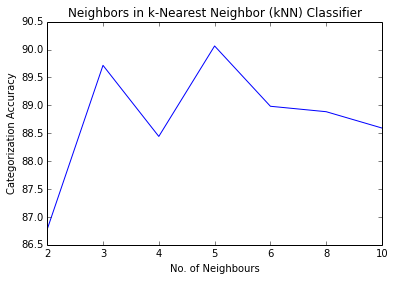

In [32]:
#Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(selectNeighbourScores, label = "Neighbors in k-Nearest Neighbor (kNN) Classifier")
plt.title("Neighbors in k-Nearest Neighbor (kNN) Classifier")

labels = [2,3,4,5,6,8,10]
plt.xticks(np.arange(len(labels)), labels, rotation='horizontal')
# plt.title("Optimal choice of Neighbors in k-Nearest Neighbor (kNN) Classifier")
plt.ylabel('Categorization Accuracy')
plt.xlabel('No. of Neighbours')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Hence, we choose k=3 for our nearest neighbor classifier.

### Selection of Parameters for Random Forest

In [21]:
selectRandomForestScores = []

params = {'trees':200, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':100, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':500, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':50, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':150, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':250, 'criterion':'entropy','random_state':1000}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':200, 'criterion':'gini','random_state':1000}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':100, 'criterion':'gini','random_state':1000}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':500, 'criterion':'gini','random_state':1000}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':50, 'criterion':'gini','random_state':1000}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':150, 'criterion':'gini','random_state':1000}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':250, 'criterion':'gini','random_state':1000}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

print selectRandomForestScores

91.4290365169
91.3302704827
91.4283191225
91.4779421841
91.3797754332
91.4290365169
91.2817267933
91.2823319883
91.3302704827
91.2817327051
91.3312317438
91.2817267933
[91.42903651690781, 91.33027048266891, 91.42831912248434, 91.47794218414563, 91.37977543316397, 91.42903651690781, 91.28172679334851, 91.28233198834235, 91.33027048266891, 91.28173270508515, 91.33123174384357, 91.28172679334851]


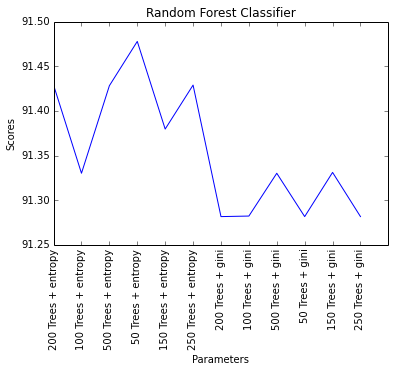

In [23]:
#Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(selectRandomForestScores, label = "Random Forest Classifier")
plt.title("Random Forest Classifier")

labels = ['200 Trees + entropy', '100 Trees + entropy', '500 Trees + entropy', '50 Trees + entropy', '150 Trees + entropy','250 Trees + entropy',
          '200 Trees + gini', '100 Trees + gini', '500 Trees + gini', '50 Trees + gini','150 Trees + gini','250 Trees + gini']

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')

plt.ylabel('Scores')
plt.xlabel('Parameters')
# Place a legend to the right of this smaller figure.
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [24]:
params = {'trees':50, 'criterion':'entropy','random_state':None}
trees = params['trees']
crit = params['criterion']
seed = params['random_state']
clf = RandomForestClassifier(n_estimators=trees,criterion=crit,random_state=seed)
clf.fit(trainBagVector, YTrain)
YPred = clf.predict(testBagVector)
writePrdictedLabelFile(YPred)

### Selection of Kernel for Multi Class SVM

In [29]:
selectKernelScores = []

params = {'kernel':'poly'}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyMultiClassSVMClassifier, params)
print score
selectKernelScores.append(score)

params = {'kernel':'linear'}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyMultiClassSVMClassifier, params)
print score
selectKernelScores.append(score)

params = {'kernel':'rbf'}
score = stratifiedKFoldVal(trainBagVector, YTrain, classifyMultiClassSVMClassifier, params)
print score
selectKernelScores.append(score)

83.6963657173
88.9788781921
86.094501401


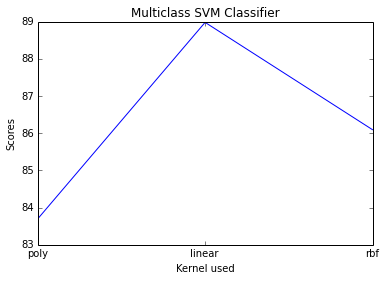

In [30]:
#Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(selectKernelScores, label = "Multiclass SVM Classifier")

labels = ['poly','linear','rbf']
plt.title("Multiclass SVM Classifier")
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(len(labels)), labels, rotation='horizontal')

plt.ylabel('Scores')
plt.xlabel('Kernel used')
# Place a legend to the right of this smaller figure.
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Classification on Binary VT Info Feature Vectors

In [ ]:
scoreMultiClassSVMClassifier = []
scoreKNNClassifier = []
scoreRandomForestClassifier = []

In [ ]:
folder = 'vt'
VTInfoTaken = ['Panda','AVware','VIPRE','Symantec','Antiy-AVL','Qihoo-360','AhnLab-V3', \
               'Avast','Kaspersky','ESET-NOD32','McAfee','BitDefender']
XTrainFeatures = CreateFeatureVec(newXTrain,folder,VTInfoTaken)
XTestFeatures = CreateFeatureVec(XTest,folder,VTInfoTaken)
# print XTestFeatures.shape, XTestFeatures[0]
# print XTrainFeatures.shape,XTrainFeatures[0]

params = {'trees':200, 'criterion':'entropy'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier,params)
print score
scoreRandomForestClassifier.append(score)

params = {'kernel':'linear'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyMultiClassSVMClassifier, params)
print score
scoreMultiClassSVMClassifier.append(score)

params = {'neighbours':3}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
scoreKNNClassifier.append(score)

clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
clf.fit(XTrainFeatures, newYTrain)
YPred = clf.predict(XTestFeatures)
writePrdictedLabelFile(YPred)

In [ ]:
folder = 'vt'
VTInfoTaken = VTRange.keys()
XTrainFeatures = CreateFeatureVec(newXTrain,folder,VTInfoTaken)
XTestFeatures = CreateFeatureVec(XTest,folder,VTInfoTaken)
# print XTestFeatures.shape, XTestFeatures[0]
# print XTrainFeatures.shape,XTrainFeatures[0]
# print countNullVectors(XTrainFeatures, len(VTInfoTaken))
# print countNullVectors(XTestFeatures, len(VTInfoTaken))

params = {'trees':200, 'criterion':'entropy'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
scoreRandomForestClassifier.append(score)

# # params = {'kernel':'rbf'}
# params = {'kernel':'linear'}
# # params = {'kernel':'poly'}
# score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyMultiClassSVMClassifier, params)
# print score
# params = {'neighbours':2}
# score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
# print score
params = {'kernel':'linear'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyMultiClassSVMClassifier, params)
print score
scoreMultiClassSVMClassifier.append(score)

params = {'neighbours':3}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
scoreKNNClassifier.append(score)

clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
clf.fit(XTrainFeatures, newYTrain)
YPred = clf.predict(XTestFeatures)
writePrdictedLabelFile(YPred)

### Classification on VT Info Feature Vectors Based on Frequency

In [ ]:
folder = 'vt'
VTInfoTaken = ['Panda','AVware','VIPRE','Symantec','Antiy-AVL','Qihoo-360','AhnLab-V3', \
               'Avast','Kaspersky','ESET-NOD32','McAfee','BitDefender']
VTInfoTaken = VTRange.keys()
XTrainFeatures = CreateFeatureVecFreq(newXTrain,folder,VTInfoTaken)
XTestFeatures = CreateFeatureVecFreq(XTest,folder,VTInfoTaken)
# print XTestFeatures.shape, XTestFeatures[0]
# print XTrainFeatures.shape,XTrainFeatures[0]
# print countNullVectors(XTrainFeatures, len(VTInfoTaken))
# print countNullVectors(XTestFeatures, len(VTInfoTaken))

params = {'trees':200, 'criterion':'entropy'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
scoreRandomForestClassifier.append(score)

params = {'kernel':'linear'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyMultiClassSVMClassifier, params)
print score
scoreMultiClassSVMClassifier.append(score)

params = {'neighbours':3}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
scoreKNNClassifier.append(score)

clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
clf.fit(XTrainFeatures, newYTrain)
YPred = clf.predict(XTestFeatures)
writePrdictedLabelFile(YPred)

### Classification on PE Info Feature Vectors Based on Entropy Mean

In [ ]:
### Classification on combination of VT Info Feature Vectors Based on PE Info (Entropy Means)
folder = 'peinfo'
relevantSubTypes = ['pe_section']
PEInfoTaken = ['entropy']
XTrainFeaturesPE = CreateFeatureVecPEI(newXTrain,folder,PEInfoTaken,relevantSubTypes)
XTestFeaturesPE = CreateFeatureVecPEI(XTest,folder,PEInfoTaken,relevantSubTypes)
# print XTestFeaturesPE.shape, XTestFeaturesPE[0]
# print XTrainFeaturesPE.shape,XTrainFeaturesPE[0]
# print countNullVectors(XTrainFeaturesPE, len(VTInfoTaken))
# print countNullVectors(XTestFeaturesPE, len(VTInfoTaken))
params = {'trees':200, 'criterion':'entropy'}
score = stratifiedKFoldVal(XTrainFeaturesPE, newYTrain, classifyRandomForestClassifier, params)
print score
scoreRandomForestClassifier.append(score)

params = {'kernel':'linear'}
score = stratifiedKFoldVal(XTrainFeaturesPE, newYTrain, classifyMultiClassSVMClassifier, params)
print score
scoreMultiClassSVMClassifier.append(score)

params = {'neighbours':3}
score = stratifiedKFoldVal(XTrainFeaturesPE, newYTrain, classifyKNNClassifier, params)
print score
scoreKNNClassifier.append(score)

### Classification on Combination of VT Info Feature Vectors Based on Binary Encoding and PE Info(Entropy Means)

In [ ]:
folder = 'vt'
VTInfoTaken = VTRange.keys()
XTrainFeatures = CreateFeatureVec(newXTrain,folder,VTInfoTaken)
XTestFeatures = CreateFeatureVec(XTest,folder,VTInfoTaken)
# print XTestFeatures.shape, XTestFeatures[0]
# print XTrainFeatures.shape,XTrainFeatures[0]
# print countNullVectors(XTrainFeatures, len(VTInfoTaken))
# print countNullVectors(XTestFeatures, len(VTInfoTaken))

folder = 'peinfo'
relevantSubTypes = ['pe_section']
PEInfoTaken = ['entropy']
XTrainFeaturesPE = CreateFeatureVecPEI(newXTrain,folder,PEInfoTaken,relevantSubTypes)
XTestFeaturesPE = CreateFeatureVecPEI(XTest,folder,PEInfoTaken,relevantSubTypes)
# print XTestFeaturesPE.shape, XTestFeaturesPE[0]
# print XTrainFeaturesPE.shape,XTrainFeaturesPE[0]
# print countNullVectors(XTrainFeaturesPE, len(VTInfoTaken))
# print countNullVectors(XTestFeaturesPE, len(VTInfoTaken))

# relevantSubTypes = ['pe_resource']
# PEInfoTaken = ['language', 'resource_id']
# XTrainFeaturesPE1 = CreateFeatureVecPEI(newXTrain,folder,PEInfoTaken,relevantSubTypes)
# XTestFeaturesPE1 = CreateFeatureVecPEI(XTest,folder,PEInfoTaken,relevantSubTypes)
# print XTestFeaturesPE1.shape, XTestFeaturesPE1[0]
# print XTrainFeaturesPE1.shape,XTrainFeaturesPE1[0]
# print countNullVectors(XTrainFeaturesPE1, len(VTInfoTaken))
# print countNullVectors(XTestFeaturesPE1, len(VTInfoTaken))

params = {'trees':200, 'criterion':'entropy'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
scoreRandomForestClassifier.append(score)

params = {'kernel':'linear'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyMultiClassSVMClassifier, params)
print score
scoreMultiClassSVMClassifier.append(score)

params = {'neighbours':3}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
scoreKNNClassifier.append(score)

XTrainClf = np.concatenate((XTrainFeatures, XTrainFeaturesPE), axis=1)
XTestClf = np.concatenate((XTestFeatures, XTestFeaturesPE), axis=1)
# print XTrainClf[0],XTestClf[0]
# print XTrainClf.shape, XTestClf.shape

clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
clf.fit(XTrainClf, newYTrain)
YPred = clf.predict(XTestClf)
writePrdictedLabelFile(YPred)

### Classification on Combination of VT Info Feature Vectors Based on Frequency Encoding and PE Info(Entropy Means)

In [ ]:
folder = 'vt'
VTInfoTaken = VTRange.keys()
XTrainFeatures = CreateFeatureVecFreq(newXTrain,folder,VTInfoTaken)
XTestFeatures = CreateFeatureVecFreq(XTest,folder,VTInfoTaken)
# print XTestFeatures.shape, XTestFeatures[0]
# print XTrainFeatures.shape,XTrainFeatures[0]
# print countNullVectors(XTrainFeatures, len(VTInfoTaken))
# print countNullVectors(XTestFeatures, len(VTInfoTaken))

folder = 'peinfo'
relevantSubTypes = ['pe_section']
PEInfoTaken = ['entropy']
XTrainFeaturesPE = CreateFeatureVecPEI(newXTrain,folder,PEInfoTaken,relevantSubTypes)
XTestFeaturesPE = CreateFeatureVecPEI(XTest,folder,PEInfoTaken,relevantSubTypes)
# print XTestFeaturesPE.shape, XTestFeaturesPE[0]
# print XTrainFeaturesPE.shape,XTrainFeaturesPE[0]
# print countNullVectors(XTrainFeaturesPE, len(VTInfoTaken))
# print countNullVectors(XTestFeaturesPE, len(VTInfoTaken))

# relevantSubTypes = ['pe_resource']
# PEInfoTaken = ['language', 'resource_id']
# XTrainFeaturesPE1 = CreateFeatureVecPEI(newXTrain,folder,PEInfoTaken,relevantSubTypes)
# XTestFeaturesPE1 = CreateFeatureVecPEI(XTest,folder,PEInfoTaken,relevantSubTypes)
# print XTestFeaturesPE1.shape, XTestFeaturesPE1[0]
# print XTrainFeaturesPE1.shape,XTrainFeaturesPE1[0]
# print countNullVectors(XTrainFeaturesPE1, len(VTInfoTaken))
# print countNullVectors(XTestFeaturesPE1, len(VTInfoTaken))

params = {'trees':100, 'criterion':'gini'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
scoreRandomForestClassifier.append(score)

params = {'kernel':'linear'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyMultiClassSVMClassifier, params)
print score
scoreMultiClassSVMClassifier.append(score)

params = {'neighbours':3}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
scoreKNNClassifier.append(score)

XTrainClf = np.concatenate((XTrainFeatures, XTrainFeaturesPE), axis=1)
XTestClf = np.concatenate((XTestFeatures, XTestFeaturesPE), axis=1)
# print XTrainClf[0],XTestClf[0]
# print XTrainClf.shape, XTestClf.shape

clf = RandomForestClassifier(n_estimators=100,criterion='gini')
clf.fit(XTrainClf, newYTrain)
YPred = clf.predict(XTestClf)
writePrdictedLabelFile(YPred)

### Graphs depicting Categorization Accuracy scores on KFold Stratified Validation on Train data for:
### 1. PE Info <br></br> 2. VTInfo and  <br></br> 3. Both PE Info & VTInfo

In [ ]:
print scoreRandomForestClassifier
print scoreKNNClassifier
print scoreMultiClassSVMClassifier

In [ ]:
#Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scoreRandomForestClassifier, label = "Random Forest Classifier")
plt.plot(scoreMultiClassSVMClassifier, label = "Multiclass Linear SVM Classifier")
plt.plot(scoreKNNClassifier, label = "KNN Classifier")

labels = ['Limited AVs(Binary Encoding)', 'All AVs(Binary Encoding)', 'All AVs(Frequency Encoding)', 'PE Info(Entropy Mean)', 
          'All AVs(Binary Encoding) + Entropy Mean','All AVs(Frequency Encoding) + Entropy Mean']

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')

plt.ylabel('Scores')
plt.xlabel('Feature Encoding used')
# Place a legend to the right of this smaller figure.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Final evaluation results on Kaggle

### Bar graph depicting Public vs Private Categorization Accuracy Scores on the different Models.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 6
publicScore = (97.733, 97.971, 94.511, 94.988, 95.107, 97.613)
privateScore = (96.897, 96.778, 94.272, 95.704, 95.585, 96.778,)
modelNames = ('RF(G,100)+Entropy(Median)+Freq', 'RF(G,100)+Entropy(Mean)+Freq', 'kNN(3)+Freq', 
              'SVM(Linear)+Entropy(Mean)+Binary', 'RF(E,200)+Binary', 'RF(E,150)+Freq')

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, publicScore, width, color='m')

rects2 = ax.bar(ind + width, privateScore, width, color='c')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Evaluations of submissions using Categorization Accuracy.')
ax.set_xticks(ind + width)
ax.set_xticklabels(modelNames,  rotation='vertical')
ax.set_ylim(90,100)

# def autolabel(rects):
#     # attach some text labels
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

# Place a legend to the right of this smaller figure.
ax.legend((rects1[0], rects2[0]), ('Public Scores', 'Private Scores'), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### Hence we conclude that the best model is Random Forest with Gini as criterion and 100 Trees using PEInfo with Entropy Mean/Median and frequency encoding on all 75 Antiviruses of VT Info as features !